## Fine Tuning of Yolo-v12 Model to detect Robots in RFC Videos

---



In [ ]:
%pip install boxmot==13.0.9
%pip install ultralytics==8.3.159
%pip install onnxscript

In [ ]:
from ultralytics import YOLO
import torch
from multiprocessing import freeze_support

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/EECS442/final_project/yolo_finetuning

/content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning


GPU Available:  True
GPU Name Tesla T4


100%|██████████| 5.34M/5.34M [00:00<00:00, 71.5MB/s]


New https://pypi.org/project/ultralytics/8.3.233 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.159 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./Roboter_labeled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, 

100%|██████████| 755k/755k [00:00<00:00, 24.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              


  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 1]        
  9                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 10             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 11                  -1  1     86912  ultralytics.nn.modules.block.A2C2f           [384, 128, 1, False, -1]      
 12                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 13             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 14                  -1  1     24000  ultralytics.nn.modules.block.A2C2f           [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 2.5±2.5 ms, read: 0.7±0.6 MB/s, size: 153.5 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/Roboter_labeled/train/labels... 163 images, 0 backgrounds, 0 corrupt: 100%|██████████| 163/163 [01:00<00:00,  2.68it/s]

train: New cache created: /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/Roboter_labeled/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 687, len(boxes) = 969. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.2±0.8 ms, read: 0.4±0.0 MB/s, size: 142.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/Roboter_labeled/valid/labels... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:35<00:00,  1.30it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/Roboter_labeled/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 198, len(boxes) = 276. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.35G      1.141      3.042      1.082         37        640: 100%|██████████| 11/11 [00:21<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all         46        276     0.0175      0.877     0.0408     0.0269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.36G       1.06      1.715      1.015         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         46        276     0.0187      0.935      0.049     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.39G      1.007       1.05      1.017         39        640: 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         46        276     0.0193      0.967     0.0577     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.39G      1.014      0.954      1.016         38        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         46        276     0.0178      0.888     0.0337     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.41G     0.9544     0.9085      1.007         27        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         46        276     0.0191      0.953     0.0378     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.43G     0.9249      0.871      1.009         34        640: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         46        276     0.0199      0.993     0.0364     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.44G     0.9811     0.8491      1.021         53        640: 100%|██████████| 11/11 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


                   all         46        276          1      0.388      0.621      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.46G     0.9396     0.8289      1.015         25        640: 100%|██████████| 11/11 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         46        276     0.0964      0.326      0.134     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.48G      0.947     0.8348      1.018         40        640: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         46        276      0.482      0.728      0.552      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.49G     0.9302     0.7965     0.9933         29        640: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         46        276      0.873      0.695      0.846      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       3.5G     0.9436      0.815      1.006         53        640: 100%|██████████| 11/11 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         46        276      0.958      0.866      0.946       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.52G     0.9778     0.8006      1.018         44        640: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


                   all         46        276      0.977      0.761      0.932      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.54G     0.9212     0.7751      1.011         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         46        276      0.923       0.88       0.95      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.55G     0.8305     0.7502     0.9912         22        640: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         46        276      0.926      0.902      0.955      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.56G     0.8322     0.7165     0.9774         17        640: 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


                   all         46        276       0.98      0.874      0.957      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.58G     0.7833     0.6786     0.9602         35        640: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         46        276      0.871      0.888      0.943       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.59G      0.826     0.6938     0.9747         42        640: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]


                   all         46        276      0.947      0.905      0.967      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.61G     0.8099     0.6726     0.9711         41        640: 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


                   all         46        276      0.946      0.896      0.956      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.62G     0.8409     0.6997     0.9738         48        640: 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         46        276      0.956      0.812      0.943      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.64G      0.839      0.692     0.9911         26        640: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         46        276      0.904      0.922      0.961      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.65G     0.8179     0.6752     0.9597         28        640: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         46        276      0.906      0.911      0.971      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.67G     0.7939     0.6418     0.9588         27        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         46        276      0.912      0.924       0.97       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.68G     0.7658     0.6311     0.9513         34        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         46        276      0.975       0.87      0.972      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.7G     0.7859     0.6488     0.9765         38        640: 100%|██████████| 11/11 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         46        276      0.923      0.911      0.972      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.71G     0.7167     0.6067     0.9344         25        640: 100%|██████████| 11/11 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         46        276      0.983      0.884      0.975      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.73G     0.7648     0.6247     0.9628         37        640: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         46        276      0.988      0.884       0.97      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.74G     0.7374     0.6087     0.9313         44        640: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         46        276      0.968      0.865      0.968      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.76G      0.753     0.6065     0.9571         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


                   all         46        276      0.976       0.88      0.974      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.78G      0.754      0.608     0.9479         19        640: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         46        276      0.945      0.925      0.972      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.79G     0.7339     0.5727     0.9436         28        640: 100%|██████████| 11/11 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         46        276      0.968      0.886      0.971      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.79G     0.7014     0.5645     0.9484         29        640: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         46        276      0.961      0.881      0.965      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.81G     0.7403     0.5744     0.9257         43        640: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         46        276      0.954      0.896      0.971      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.83G     0.6958      0.544     0.9312         38        640: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         46        276      0.977       0.88      0.966      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.84G     0.6743     0.5258     0.9234         35        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         46        276      0.942      0.942      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.85G     0.6869     0.5381     0.9382         25        640: 100%|██████████| 11/11 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         46        276      0.929      0.924      0.973      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.87G     0.7235     0.5515     0.9336         45        640: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         46        276      0.969      0.895      0.979       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.89G     0.6531     0.5418     0.9201         37        640: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         46        276      0.971      0.895      0.977      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.9G     0.6908     0.5215     0.9272         46        640: 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         46        276      0.988      0.897      0.981      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.91G     0.6691      0.531     0.9248         25        640: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         46        276      0.946      0.955      0.982      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.93G     0.6913     0.5151     0.9243         46        640: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         46        276      0.984      0.897      0.968      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.95G     0.6965     0.5175     0.9345         34        640: 100%|██████████| 11/11 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         46        276      0.955      0.935      0.984      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.96G     0.6681     0.5052      0.913         33        640: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         46        276       0.96      0.951      0.984      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.97G     0.6647     0.5052     0.9123         47        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         46        276      0.981      0.931      0.982      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.99G     0.6689     0.5142      0.921         37        640: 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         46        276       0.98      0.964      0.986      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.01G     0.6678     0.5073     0.9208         32        640: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         46        276       0.96      0.967      0.985      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.02G     0.6482      0.493     0.9211         32        640: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         46        276      0.921       0.97      0.985      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.03G     0.6268     0.4815     0.9054         37        640: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


                   all         46        276      0.977      0.932      0.985       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.05G      0.669     0.5022     0.9243         25        640: 100%|██████████| 11/11 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         46        276      0.944      0.935      0.983      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.06G     0.6345     0.4785      0.915         35        640: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         46        276      0.946      0.949      0.982      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.08G     0.6805     0.4997     0.9294         36        640: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]


                   all         46        276      0.959      0.934      0.984      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.09G     0.6462     0.4698     0.8952         29        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         46        276      0.975      0.902      0.979      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.11G     0.6644     0.4758     0.9235         48        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         46        276      0.971      0.909      0.981      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.12G     0.6356     0.4756     0.9155         34        640: 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         46        276      0.947      0.928      0.979      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.14G     0.6357     0.4783     0.9204         24        640: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         46        276       0.96      0.962       0.98      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.15G     0.6155     0.4655     0.9039         50        640: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         46        276      0.969      0.971      0.988       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.17G     0.6197     0.4658     0.9046         43        640: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         46        276      0.923      0.949      0.977      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.18G     0.6332     0.4697     0.9172         27        640: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         46        276      0.987      0.906      0.985      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       4.2G     0.6466     0.4764     0.9274         20        640: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         46        276      0.953      0.948      0.986      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.21G      0.644     0.4699     0.9091         41        640: 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         46        276      0.948      0.932       0.98      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.23G     0.6717     0.4696     0.9159         42        640: 100%|██████████| 11/11 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         46        276      0.975      0.928      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.24G     0.6268     0.4613      0.916         36        640: 100%|██████████| 11/11 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         46        276      0.981      0.944      0.989      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.26G     0.6159     0.4521     0.9055         32        640: 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         46        276      0.953       0.95      0.986      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.27G     0.6251     0.4484     0.8973         42        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         46        276      0.956      0.935      0.984      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.29G     0.5876     0.4322      0.888         29        640: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         46        276       0.97      0.931      0.985      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       4.3G     0.6268     0.4587     0.9109         38        640: 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         46        276       0.96      0.942      0.987      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.32G     0.6397     0.4519     0.8997         43        640: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         46        276       0.96      0.946      0.985      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.33G     0.5956     0.4415      0.896         49        640: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         46        276       0.99      0.884      0.977      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.35G     0.6113     0.4457     0.9084         36        640: 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         46        276      0.977      0.935      0.987      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.36G     0.5771     0.4216     0.8903         41        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         46        276      0.968      0.975      0.986      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.38G     0.5739     0.4306     0.8883         19        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]


                   all         46        276       0.96      0.947      0.984      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.38G     0.6059     0.4246     0.8905         32        640: 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         46        276      0.985      0.877      0.979      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.41G     0.5923     0.4258     0.8888         46        640: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


                   all         46        276      0.952      0.934      0.982      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.42G     0.5663      0.418      0.885         47        640: 100%|██████████| 11/11 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         46        276      0.971      0.953      0.987      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.44G     0.5626     0.4081     0.8805         38        640: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         46        276      0.957      0.978      0.986      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.44G     0.5785     0.4146     0.8906         49        640: 100%|██████████| 11/11 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         46        276      0.971      0.958      0.988      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.46G     0.5901     0.4159     0.8877         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         46        276      0.972      0.971      0.989      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.48G      0.584     0.4188     0.8826         34        640: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         46        276      0.971      0.974      0.988      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.49G     0.5653      0.419      0.892         39        640: 100%|██████████| 11/11 [00:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         46        276      0.974      0.971      0.989      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       4.5G     0.5573     0.4141      0.883         40        640: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         46        276      0.968      0.974      0.989      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.53G     0.5931      0.418     0.8958         22        640: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         46        276      0.975      0.978       0.99      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.54G     0.5293      0.388     0.8697         45        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         46        276       0.96      0.971      0.988      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.55G     0.5448     0.3908     0.8766         35        640: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         46        276      0.974      0.948      0.989      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.56G     0.5639     0.3879     0.8761         41        640: 100%|██████████| 11/11 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         46        276      0.973      0.953      0.988      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.58G     0.5273     0.3883     0.8749         35        640: 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         46        276      0.978      0.966      0.989      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       4.6G     0.5628     0.4116     0.8878         42        640: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         46        276      0.971      0.975       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.61G       0.56     0.4004     0.8762         22        640: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         46        276      0.979      0.978       0.99      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.62G     0.5296     0.3886     0.8848         27        640: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         46        276      0.974      0.975      0.989      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.64G     0.5361     0.3914     0.8777         37        640: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         46        276      0.972      0.971      0.989      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.66G       0.55     0.3799     0.8753         27        640: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         46        276      0.964      0.972      0.989      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.67G     0.5278     0.3817     0.8784         25        640: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         46        276      0.971      0.957      0.989      0.856


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.68G     0.5571     0.4248     0.8789         16        640: 100%|██████████| 11/11 [00:07<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         46        276      0.982      0.973       0.99      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.7G     0.4904     0.3834     0.8621         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


                   all         46        276      0.978      0.972      0.989      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.72G     0.4982     0.3812      0.855         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         46        276      0.974      0.978      0.989      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.73G     0.5123     0.3776     0.8675         18        640: 100%|██████████| 11/11 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         46        276      0.975      0.981      0.989      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.74G     0.5131     0.3665     0.8611         18        640: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         46        276      0.971      0.981      0.988      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.76G     0.4608     0.3522      0.845         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         46        276      0.971       0.98      0.988      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.78G     0.4991     0.3596     0.8559         18        640: 100%|██████████| 11/11 [00:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         46        276      0.971      0.978      0.988      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.79G     0.4655      0.352     0.8561         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         46        276      0.968      0.977      0.987      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.8G     0.4713     0.3458     0.8431         18        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         46        276      0.969      0.978      0.988      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.82G     0.4409     0.3388     0.8416         15        640: 100%|██████████| 11/11 [00:03<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         46        276      0.969      0.982      0.988      0.855



100 epochs completed in 0.141 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


                   all         46        276      0.974      0.946      0.989      0.865
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.159 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 71.8±8.3 MB/s, size: 153.0 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/Roboter_labeled/valid/labels.cache... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 198, len(boxes) = 276. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


                   all         46        276      0.974      0.948      0.989      0.865
Speed: 3.1ms preprocess, 15.5ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/train2

image 1/1 /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/Roboter_labeled/test/images/RFC_2022_2_mov-0009_jpg.rf.e36e9b82437c9a673ccdcc315cdd1438.jpg: 288x640 7 Robotss, 55.7ms
Speed: 2.7ms preprocess, 55.7ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)


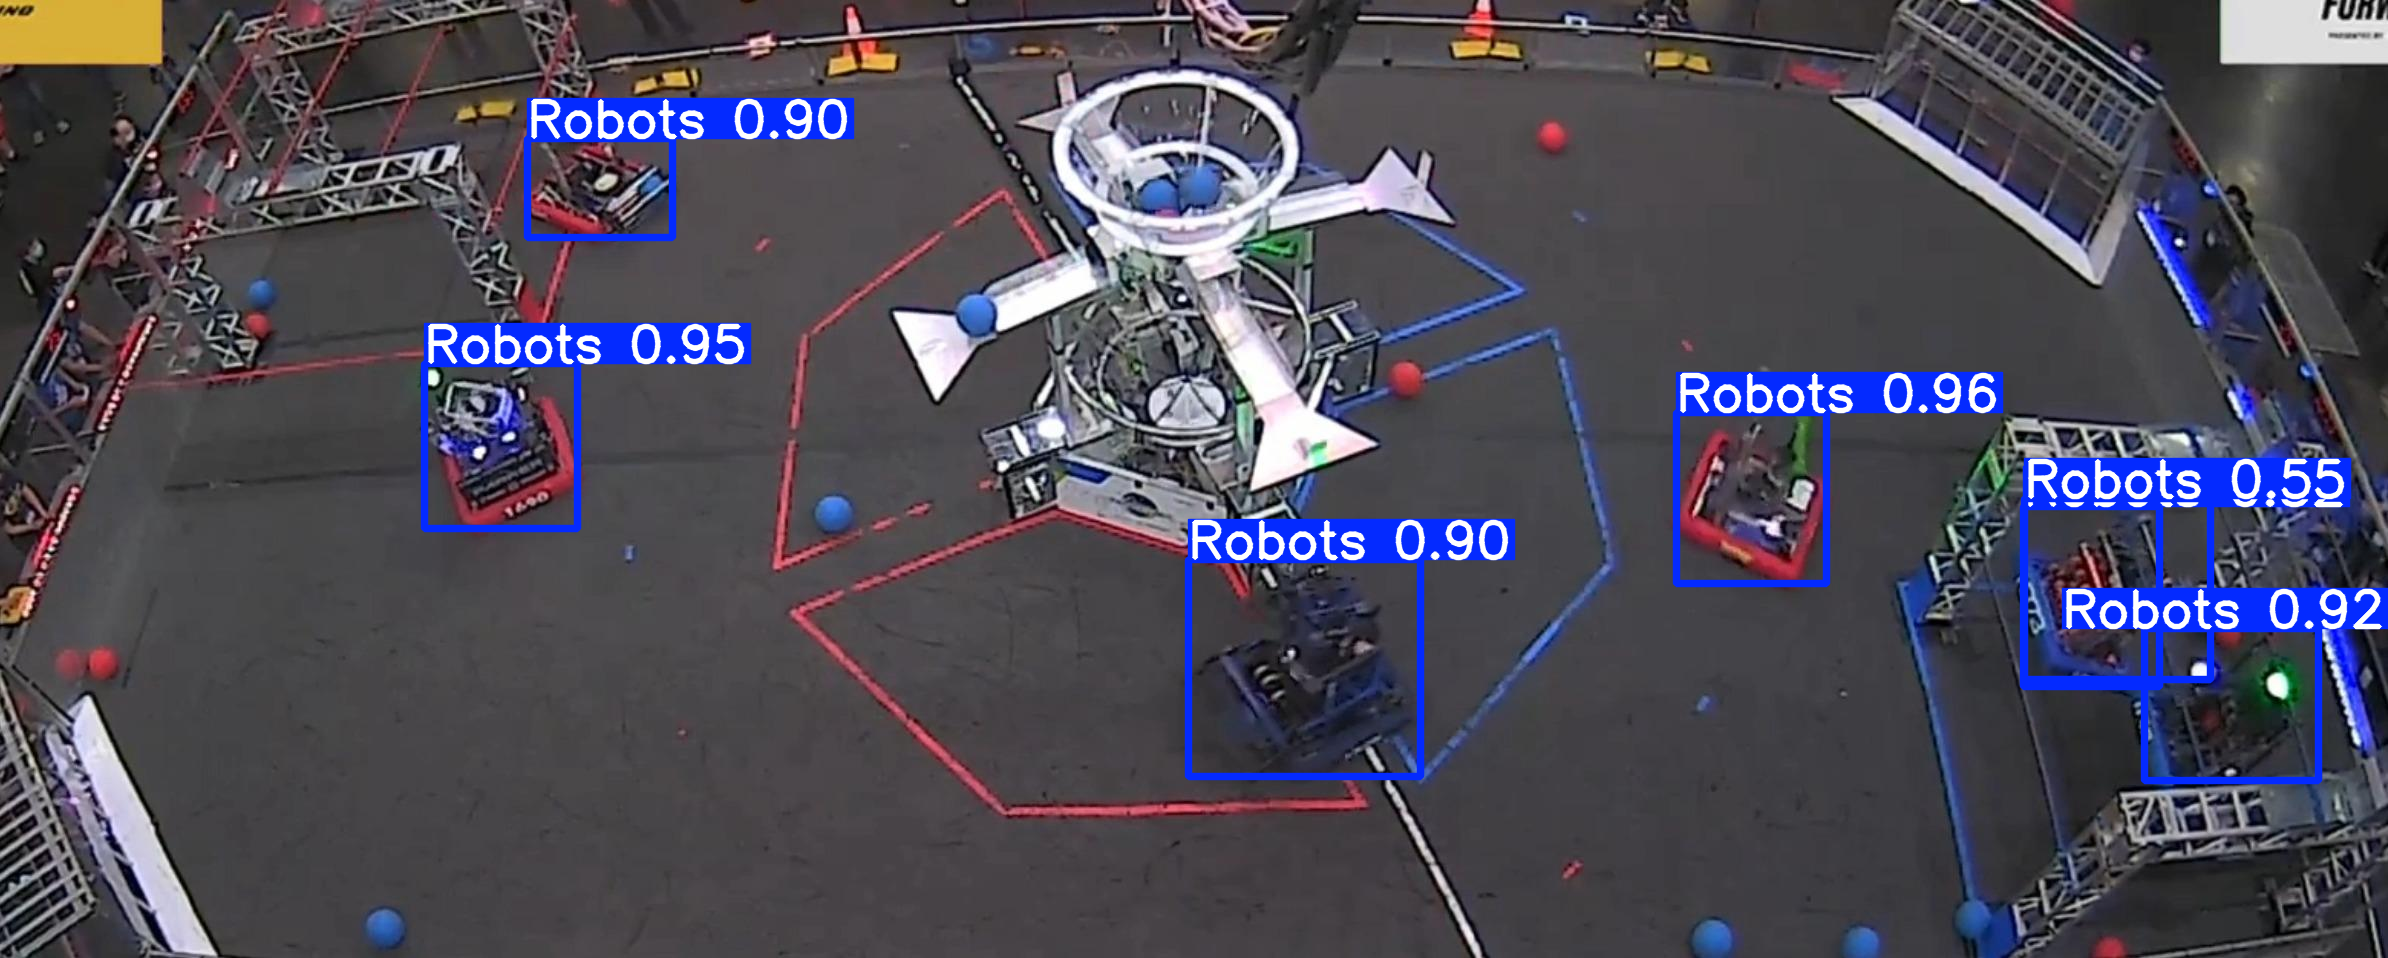

Ultralytics 8.3.159 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 10...
ERROR ❌ ONNX: export failure 9.5s: No module named 'onnxscript'


ModuleNotFoundError: No module named 'onnxscript'

In [ ]:
freeze_support()

print("GPU Available: ", torch.cuda.is_available())
print("GPU Name", torch.cuda.get_device_name(0))

model = YOLO('yolo12n.pt')

# Train Model on labeled Roboter Dataset. Images obtained from videos of the 2022/23/24
results = model.train(
    data= "./Data/Roboter_labeled/data.yaml",
    epochs = 100,
    imgsz = 640,
    device = 0,
    name="train",
    )

# Evaluate Model
metrics = model.val()

# Perform Object detection
results = model("./Data/Roboter_labeled/test/images/RFC_2022_2_mov-0009_jpg.rf.e36e9b82437c9a673ccdcc315cdd1438.jpg")
results[0].show()

path = model.export(format="onnx")


In [ ]:
model_path = "./runs/detect/train/weights/best.pt"
model = YOLO(model_path)
result = model(source="./RFC_2022_2_short.mp4", conf = 0.25, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/441) /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/RFC_2022_2_short.mp4: 288x640 6 Robotss, 57.5ms
video 1/1 (frame 2/441) /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/RFC_2022_2_short.mp4: 288x640 6 Robotss, 14.3ms
video 1/1 (frame 3/441) /content/drive/MyDrive/Colab Notebooks/EECS442/final_project/yolo_finetuning/RFC_2022_2_short.mp4: 288x640 6 Robotss, 12.8ms
video 1/1